<a href="https://colab.research.google.com/github/manasik29/Support_Vector_Machines/blob/main/SVM_Salary_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

1) Prepare a classification model using SVM for salary data 

**Data Description:**

age -- age of a person

workclass	-- A work class is a grouping of work 

education	-- Education of an individuals	

maritalstatus -- Marital status of an individulas	

occupation	 -- occupation of an individuals

relationship -- 	

race --  Race of an Individual

sex --  Gender of an Individual

capitalgain --  profit received from the sale of an investment	

capitalloss	-- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week	

native -- Native of an individual

Salary -- salary of an individual

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split

df_train = pd.read_csv('/content/SalaryData_Train(1).csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
df_train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [3]:
df_train.shape

(30161, 14)

In [4]:
df_test = pd.read_csv('/content/SalaryData_Test(1).csv')
df_test.shape

(15060, 14)

In [66]:
df = df_train.append(df_test)
df.shape

(45221, 14)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45221 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [71]:
#educationno and education depicts the same thing, we can go ahead and delete one
df.drop('educationno', axis=1, inplace=True)

In [73]:
df.shape

(45221, 13)

In [75]:
df.head()

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**EDA**

In [82]:
#check for missing values
df.isnull().sum()

age              0
workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

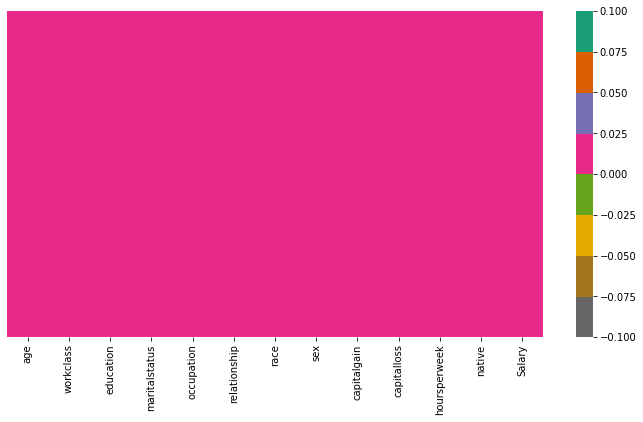

In [79]:
sns.heatmap(df.isnull(), cmap = ('Dark2_r'), yticklabels=False, )

In [81]:
df.dtypes

age               int64
workclass        object
education        object
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object

Observations:

- No missing values.
- No incorrect data types.

**Data Visualisation**

In [80]:
df.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

    index  Salary
0   <=50K   34013
1    >50K   11208


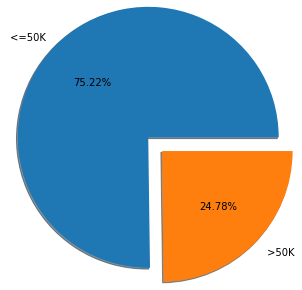

In [98]:
plt.rcParams['figure.figsize']=(3,3)
plt.pie(df.Salary.value_counts().values, labels = df.Salary.value_counts().index, autopct="%1.2f%%", radius =2, shadow=True, explode=(0,0.3))
print(df.Salary.value_counts().reset_index())

In [99]:
workclass_df = df.groupby(['Salary', 'workclass']).size().reset_index().rename(columns={0:'Num of individuals'})
workclass_df

,Salary,workclass,Num of individuals
0,<=50K,Federal-gov,857
1,<=50K,Local-gov,2185
2,<=50K,Private,26055
3,<=50K,Self-emp-inc,734
4,<=50K,Self-emp-not-inc,2737
5,<=50K,State-gov,1426
6,<=50K,Without-pay,19
7,>50K,Federal-gov,549
8,>50K,Local-gov,915
9,>50K,Private,7251


Text(0.5, 1.1, 'Workclass of individuals to corresponding Salary')

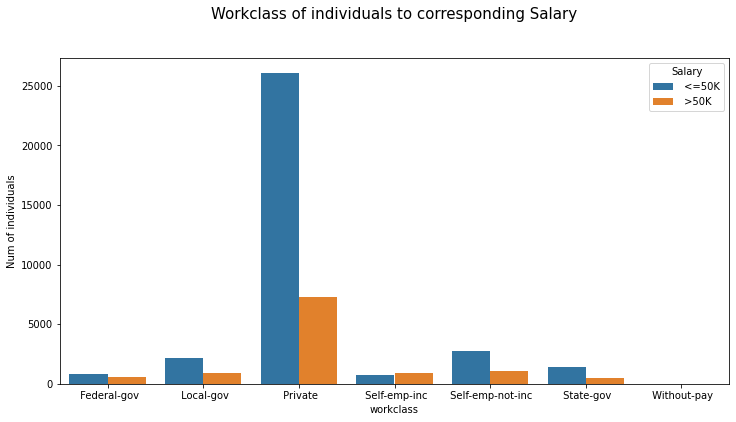

In [100]:
plt.rcParams['figure.figsize']=(12,6)
sns.barplot(x = 'workclass', y='Num of individuals', hue='Salary', data=workclass_df)
plt.title("Workclass of individuals to corresponding Salary", y = 1.1, fontsize=15)

**Observation:**

- Most individuals are into private jobs with Salary <=50k.

- In our data there are very less individual who are without pay opr unemployed.

In [44]:
import warnings
warnings.filterwarnings(action='ignore')

In [102]:
edu_df = df.groupby(['Salary', 'education']).size().reset_index().rename(columns={0:'Num of individuals'})
edu_df

,Salary,education,Num of individuals
0,<=50K,10th,1141
1,<=50K,11th,1530
2,<=50K,12th,534
3,<=50K,1st-4th,214
4,<=50K,5th-6th,427
5,<=50K,7th-8th,768
6,<=50K,9th,638
7,<=50K,Assoc-acdm,1109
8,<=50K,Assoc-voc,1455
9,<=50K,Bachelors,4392


Text(0.5, 1.1, 'Education of individuals to corresponding Salary')

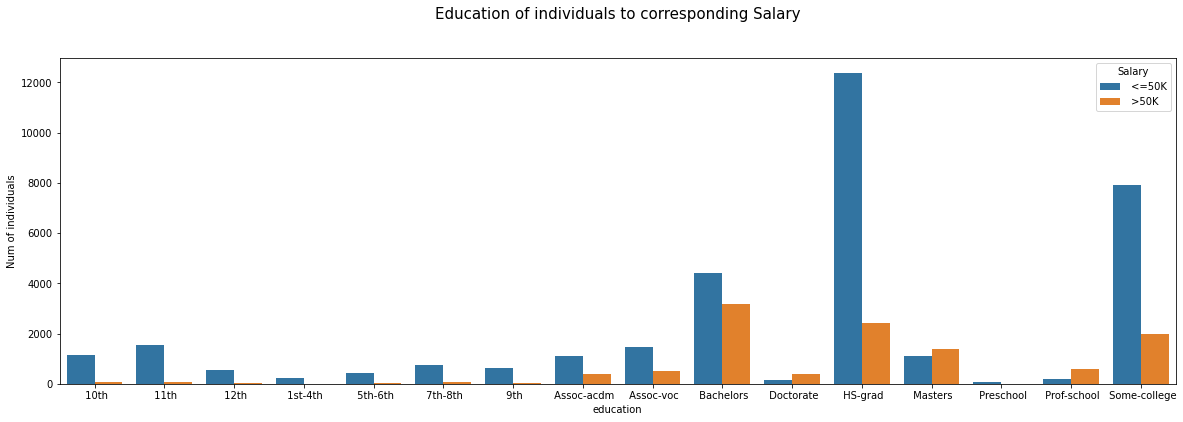

In [103]:
plt.rcParams['figure.figsize']=(20,6)
sns.barplot(x = 'education', y='Num of individuals', hue = 'Salary', data=edu_df)
plt.title("Education of individuals to corresponding Salary", y = 1.1, fontsize=15)

**Observations:**

- Most of the individuals have studied for 9 years.
- Then the highest rankings are individuals who have studied for 10 & 13 years.

In [104]:
rel_df = df.groupby(['maritalstatus', 'relationship', 'Salary']).size().reset_index().rename(columns={0:'Num of indv'})
rel_df

,maritalstatus,relationship,Salary,Num of indv
0,Divorced,Not-in-family,<=50K,2994
1,Divorced,Not-in-family,>50K,441
2,Divorced,Other-relative,<=50K,159
3,Divorced,Other-relative,>50K,7
4,Divorced,Own-child,<=50K,413
5,Divorced,Own-child,>50K,16
6,Divorced,Unmarried,<=50K,2076
7,Divorced,Unmarried,>50K,191
8,Married-AF-spouse,Husband,<=50K,7
9,Married-AF-spouse,Husband,>50K,4


Text(0.5, 1.1, 'Salary category wrt Marital status')

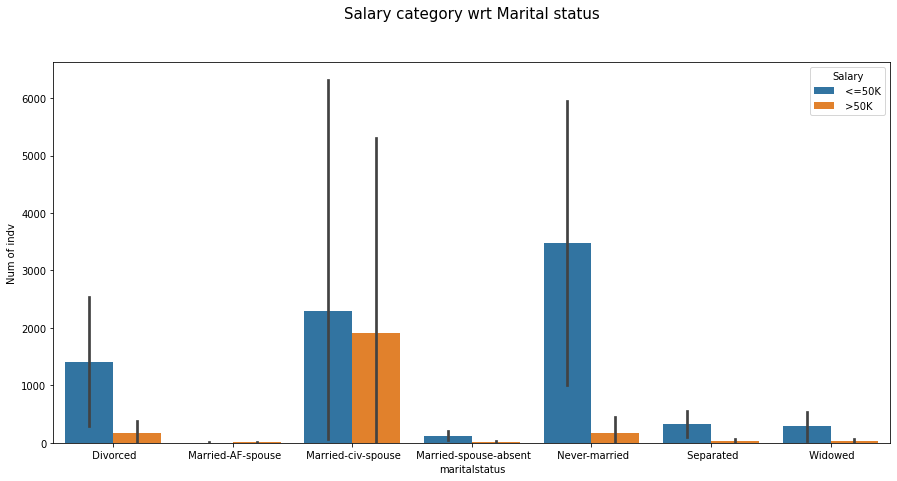

In [107]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'maritalstatus', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Marital status", y = 1.1, fontsize=15)

- Most individuals in our data are who have never married and are earning <=50k.

- Then we have individuals who are married indv earning <=50k and then married indv earning >50k.

Text(0.5, 1.1, 'Salary category wrt Relationship')

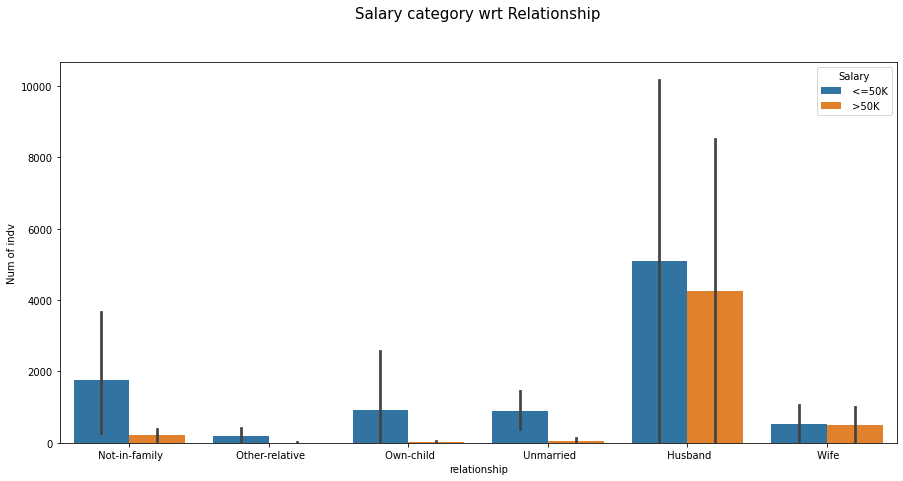

In [108]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x= 'relationship', y='Num of indv', hue='Salary', data=rel_df)
plt.title("Salary category wrt Relationship", y = 1.1, fontsize=15)

- By this graph we can futher confirm that indv who are married, who have a husband are higher and are earning <=50k and >50k.

In [109]:
df.columns

Index(['age', 'workclass', 'education', 'maritalstatus', 'occupation',
       'relationship', 'race', 'sex', 'capitalgain', 'capitalloss',
       'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [116]:
df.groupby(['occupation']).size().reset_index().rename(columns={0:'Num of Indv'})

,occupation,hoursperweek,Num of Indv
0,Adm-clerical,1,1
1,Adm-clerical,2,2
2,Adm-clerical,3,3
3,Adm-clerical,4,4
4,Adm-clerical,5,12
...,...,...,...
866,Transport-moving,85,3
867,Transport-moving,87,1
868,Transport-moving,90,4
869,Transport-moving,96,2
